In [2]:
import pandas as pd

# Ruta de los archivos CSV
ruta_natalidad = 'C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/TasaDeNatalidad/TasaDeNatalidad(1000 habitantes).csv'
ruta_esperanza_vida = 'C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/EsperanzaDeVida/EsperanzaDeVidaGeneral.csv'

# Cargar los datasets
natalidad_df = pd.read_csv(ruta_natalidad, delimiter=';', decimal=',')
esperanza_vida_df = pd.read_csv(ruta_esperanza_vida, delimiter=';', decimal=',')

# Verificar las primeras filas de los datasets
print(natalidad_df.head())
print(esperanza_vida_df.head())

   Periodo  Total
0     2022   6.88
1     2021   7.10
2     2020   7.19
3     2019   7.62
4     2018   7.94
    Año  Total
0  2022  83.08
1  2021  83.03
2  2020  82.28
3  2019  83.53
4  2018  83.15


In [3]:
import csv
import pandas as pd
import numpy as np

# Ruta del archivo Excel
archivo_excel = 'C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/PoblacionPorEdad/PoblacionPorEdad.xlsx'

# Cargar el archivo Excel en un DataFrame de pandas
df = pd.read_excel(archivo_excel, engine='openpyxl')

# Seleccionar las filas correspondientes a cada grupo
menores_de_15 = df.iloc[2:5, 1:]
entre_15_y_49 = df.iloc[5:12, 1:]
entre_50_y_64 = df.iloc[12:15, 1:]
mayores_de_65 = df.iloc[15:23, 1:]

# Función para calcular la suma por año para cada grupo
def calcular_suma_por_grupo(grupo):
    return grupo.sum(axis=0)

# Calcular la suma por año para cada grupo
suma_por_año_menores_de_15 = calcular_suma_por_grupo(menores_de_15)
suma_por_año_entre_15_y_49 = calcular_suma_por_grupo(entre_15_y_49)
suma_por_año_entre_50_y_64 = calcular_suma_por_grupo(entre_50_y_64)
suma_por_año_mayores_de_65 = calcular_suma_por_grupo(mayores_de_65)

# Seleccionar la primera fila para obtener la población total de España para cada año
poblacion_total_espana = df.iloc[1, 1:]

# Cargar los datasets de tasa de natalidad y esperanza de vida
ruta_natalidad = 'C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/TasaDeNatalidad/TasaDeNatalidad(1000 habitantes).csv'
ruta_esperanza_vida = 'C:/Users/Iker Nikolas/Desktop/TFM-24/Github/DatasetsNormalizados/EsperanzaDeVida/EsperanzaDeVidaGeneral.csv'
natalidad_df = pd.read_csv(ruta_natalidad, delimiter=';', decimal=',')
esperanza_vida_df = pd.read_csv(ruta_esperanza_vida, delimiter=';', decimal=',')

# Convertir a índices los periodos y años de los datasets
natalidad_df.set_index('Periodo', inplace=True)
esperanza_vida_df.set_index('Año', inplace=True)

# Crear un diccionario para almacenar los resultados por año
resultados_por_año = {}

# Agregar los resultados al diccionario por año
for año in df.columns[1:]:
    resultados_por_año[año] = {
        "Población Total España": poblacion_total_espana[año],
        "Menores de 15": suma_por_año_menores_de_15[año],
        "Entre 15 y 49": suma_por_año_entre_15_y_49[año],
        "Entre 50 y 64": suma_por_año_entre_50_y_64[año],
        "Mayores de 65": suma_por_año_mayores_de_65[año],
        "Tasa Natalidad": natalidad_df.loc[int(año), 'Total'] if int(año) in natalidad_df.index else None,
        "Esperanza de Vida": esperanza_vida_df.loc[int(año), 'Total'] if int(año) in esperanza_vida_df.index else None
    }

# Mostrar los resultados
for año, valores in resultados_por_año.items():
    print(año)
    print(valores)
    print()

# Crear un diccionario para almacenar los porcentajes por año de dicho rango de edad sobre la poblacion de ese año
porcentajes_por_año = {}

# Calcular los porcentajes para cada año
for año in df.columns[1:]:
    porcentajes_por_año[año] = {
        "Porcentaje Menores de 15": (suma_por_año_menores_de_15[año] / poblacion_total_espana[año]) * 100,
        "Porcentaje Entre 15 y 49": (suma_por_año_entre_15_y_49[año] / poblacion_total_espana[año]) * 100,
        "Porcentaje Entre 50 y 64": (suma_por_año_entre_50_y_64[año] / poblacion_total_espana[año]) * 100,
        "Porcentaje Mayores de 65": (suma_por_año_mayores_de_65[año] / poblacion_total_espana[año]) * 100,
        "Tasa Natalidad": resultados_por_año[año]["Tasa Natalidad"],
        "Esperanza de Vida": resultados_por_año[año]["Esperanza de Vida"]
    }

# Mostrar los porcentajes
for año, valores in porcentajes_por_año.items():
    print(año)
    print(valores)
    print()

2022
{'Población Total España': 47475420.0, 'Menores de 15': 6564052.0, 'Entre 15 y 49': 21111111.0, 'Entre 50 y 64': 10321247.0, 'Mayores de 65': 9479010.0, 'Tasa Natalidad': 6.88, 'Esperanza de Vida': 83.08}

2021
{'Población Total España': 47385107.0, 'Menores de 15': 6689607.0, 'Entre 15 y 49': 21255506.0, 'Entre 50 y 64': 10129166.0, 'Mayores de 65': 9310828.0, 'Tasa Natalidad': 7.1, 'Esperanza de Vida': 83.03}

2020
{'Población Total España': 47450795.0, 'Menores de 15': 6830633.0, 'Entre 15 y 49': 21455801.0, 'Entre 50 y 64': 9945980.0, 'Mayores de 65': 9218381.0, 'Tasa Natalidad': 7.19, 'Esperanza de Vida': 82.28}

2019
{'Población Total España': 47026208.0, 'Menores de 15': 6885528.0, 'Entre 15 y 49': 21379587.0, 'Entre 50 y 64': 9703900.0, 'Mayores de 65': 9057193.0, 'Tasa Natalidad': 7.62, 'Esperanza de Vida': 83.53}

2018
{'Población Total España': 46722980.0, 'Menores de 15': 6934897.0, 'Entre 15 y 49': 21393358.0, 'Entre 50 y 64': 9486574.0, 'Mayores de 65': 8908151.0, 'T

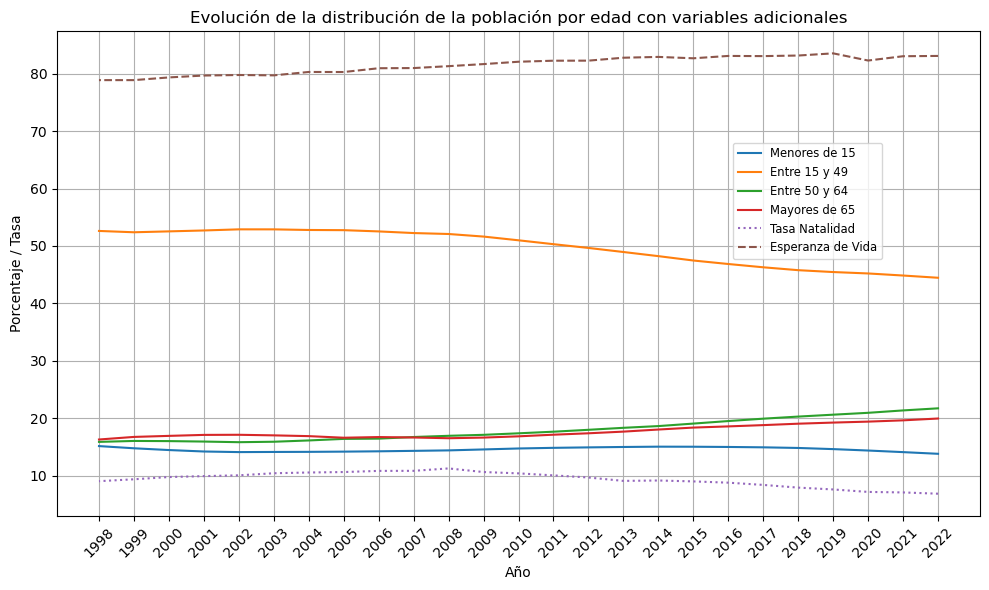

In [4]:
import matplotlib.pyplot as plt

# Crear DataFrame para visualización
df_visualizacion = pd.DataFrame(porcentajes_por_año).T

# Obtener los años
años = df_visualizacion.index

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los porcentajes de cada grupo de edad
ax.plot(años[::-1], df_visualizacion["Porcentaje Menores de 15"][::-1], label="Menores de 15")
ax.plot(años[::-1], df_visualizacion["Porcentaje Entre 15 y 49"][::-1], label="Entre 15 y 49")
ax.plot(años[::-1], df_visualizacion["Porcentaje Entre 50 y 64"][::-1], label="Entre 50 y 64")
ax.plot(años[::-1], df_visualizacion["Porcentaje Mayores de 65"][::-1], label="Mayores de 65")

# Graficar las tasas de natalidad y esperanza de vida
ax.plot(años, df_visualizacion["Tasa Natalidad"], label="Tasa Natalidad", linestyle='dotted')
ax.plot(años, df_visualizacion["Esperanza de Vida"], label="Esperanza de Vida", linestyle='dashed')

# Configurar el gráfico
ax.set_title("Evolución de la distribución de la población por edad con variables adicionales")
ax.set_xlabel("Año")
ax.set_ylabel("Porcentaje / Tasa")
ax.legend(fontsize='small', bbox_to_anchor=(0.9, 0.65), loc='center right') 
ax.grid(True)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Podemos ver en la gráfica que la tendencia del grupo "Menores de 15" y tasa de natlidad disminuye de una manera parecida, 
##y que la esperanza de vida y el grupo de "Mayores 65" y "Entre 50 y 64" tambien

In [5]:
#Tasa de crecimiento = ((Población año actual - Población año anterior)/ Población año anterior) * 100 --> Para poder hacer proyecciones futuras
 
# Crear un diccionario para almacenar las tasas de crecimiento por grupo de edad
tasas_crecimiento_por_grupo = {}

# Calcular las tasas de crecimiento para cada grupo de edad
for grupo, suma_por_año_grupo in zip(["Menores de 15", "Entre 15 y 49", "Entre 50 y 64", "Mayores de 65"], [suma_por_año_menores_de_15, suma_por_año_entre_15_y_49, suma_por_año_entre_50_y_64, suma_por_año_mayores_de_65]):
    tasas_crecimiento_por_año = {}
    for i in range(0, len(años)-1):
        tasa_crecimiento = ((suma_por_año_grupo.iloc[i] - suma_por_año_grupo.iloc[i+1]) / suma_por_año_grupo.iloc[i+1]) * 100
        tasas_crecimiento_por_año[años[i]] = tasa_crecimiento
    tasas_crecimiento_por_grupo[grupo] = tasas_crecimiento_por_año

# Mostrar las tasas de crecimiento por grupo de edad
for grupo, tasas_por_año in tasas_crecimiento_por_grupo.items():
    print(f"Tasas de crecimiento para el grupo {grupo}:")
    print(tasas_por_año)
    print()

# Calcular el promedio de las tasas de crecimiento para cada grupo de edad
promedio_tasas_crecimiento_por_grupo = {}
for grupo, tasas_por_año in tasas_crecimiento_por_grupo.items():
    promedio_tasa_crecimiento = sum(tasas_por_año.values()) / len(tasas_por_año)
    promedio_tasas_crecimiento_por_grupo[grupo] = promedio_tasa_crecimiento

# Mostrar el promedio de las tasas de crecimiento por grupo de edad
print("Promedio de tasas de crecimiento por grupo de edad desde 1998 a 2022:")
print(promedio_tasas_crecimiento_por_grupo)

# Calcular el promedio de las tasas de crecimiento para cada grupo de edad desde 2012 a 2022
promedio_tasas_crecimiento_por_grupo_2012_2022 = {}
for grupo, tasas_por_año in tasas_crecimiento_por_grupo.items():
    # Filtrar los años que deseas incluir en el cálculo del promedio
    tasas_filtradas = {año: tasa for año, tasa in tasas_por_año.items() if int(año) >= 2012 and int(año) <= 2022}
    # Calcular el promedio de las tasas de crecimiento para los años filtrados
    promedio_tasa_crecimiento = sum(tasas_filtradas.values()) / len(tasas_filtradas)
    # Almacenar el promedio de tasas de crecimiento por grupo de edad
    promedio_tasas_crecimiento_por_grupo_2012_2022[grupo] = promedio_tasa_crecimiento

# Mostrar el promedio de las tasas de crecimiento por grupo de edad desde 2012 a 2022
print("Promedio de tasas de crecimiento por grupo de edad desde 2012 a 2022:")
print(promedio_tasas_crecimiento_por_grupo_2012_2022)

Tasas de crecimiento para el grupo Menores de 15:
{'2022': -1.8768666081579979, '2021': -2.0646109957891166, '2020': -0.7972518592619185, '2019': -0.7118923323590819, '2018': -0.41361632465499665, '2017': -0.38855002594100324, '2016': -0.413978840796567, '2015': -0.38381029239371073, '2014': -0.40513666826039835, '2013': 0.18284732390042763, '2012': 0.6920982045223261, '2011': 1.1221768252421307, '2010': 1.7374902462349, '2009': 2.4337996021267783, '2008': 2.7011500992465165, '2007': 1.6538112540477885, '2006': 1.7596058707584634, '2005': 2.3933639607041353, '2004': 1.2448293441575622, '2003': 2.284436514629848, '2002': 1.0022612460580334, '2001': -0.23529636478457433, '2000': -1.3631294952834483, '1999': -1.6524374043152004}

Tasas de crecimiento para el grupo Entre 15 y 49:
{'2022': -0.6793298639891237, '2021': -0.9335237589125663, '2020': 0.35648022574056276, '2019': -0.06437044619175727, '2018': -0.7656544048379054, '2017': -1.1885649562495912, '2016': -1.4229993854790428, '2015': 

In [6]:
# Proyectar la población futura teniendo en cuenta el cambio global de porcentaje entre 1998 a 2022 sobre la poblacion global del estado
proyeccion_poblacion_futura = {}

for grupo, tasa_crecimiento in promedio_tasas_crecimiento_por_grupo.items():
    poblacion_actual = resultados_por_año['2022'][grupo]
    proyeccion_poblacion_futura[grupo] = {}
    for año in range(2023, 2047):
        poblacion_proyectada = poblacion_actual * (1 + tasa_crecimiento / 100)
        proyeccion_poblacion_futura[grupo][año] = int(poblacion_proyectada)
        poblacion_actual = poblacion_proyectada

# Mostrar la proyección de población futura
for grupo, poblacion_por_año in proyeccion_poblacion_futura.items():
    print(f'Grupo: {grupo}')
    for año, poblacion in poblacion_por_año.items():
        print(f'Año {año}: {poblacion}')
    print()

Grupo: Menores de 15
Año 2023: 6587303
Año 2024: 6610636
Año 2025: 6634053
Año 2026: 6657552
Año 2027: 6681134
Año 2028: 6704800
Año 2029: 6728550
Año 2030: 6752384
Año 2031: 6776302
Año 2032: 6800305
Año 2033: 6824393
Año 2034: 6848567
Año 2035: 6872826
Año 2036: 6897171
Año 2037: 6921602
Año 2038: 6946120
Año 2039: 6970724
Año 2040: 6995416
Año 2041: 7020195
Año 2042: 7045062
Año 2043: 7070017
Año 2044: 7095061
Año 2045: 7120193
Año 2046: 7145414

Grupo: Entre 15 y 49
Año 2023: 21118915
Año 2024: 21126722
Año 2025: 21134533
Año 2026: 21142346
Año 2027: 21150162
Año 2028: 21157981
Año 2029: 21165803
Año 2030: 21173627
Año 2031: 21181455
Año 2032: 21189286
Año 2033: 21197119
Año 2034: 21204955
Año 2035: 21212794
Año 2036: 21220637
Año 2037: 21228482
Año 2038: 21236329
Año 2039: 21244180
Año 2040: 21252034
Año 2041: 21259891
Año 2042: 21267750
Año 2043: 21275612
Año 2044: 21283478
Año 2045: 21291346
Año 2046: 21299217

Grupo: Entre 50 y 64
Año 2023: 10533418
Año 2024: 10749950
Año 2025:

In [7]:
# Proyectar la población futura utilizando las tasas de crecimiento promedio desde 2012 hasta 2022
proyeccion_poblacion_futura_2012_2022 = {}

for grupo, tasa_crecimiento in promedio_tasas_crecimiento_por_grupo_2012_2022.items():
    poblacion_actual = resultados_por_año['2022'][grupo]
    proyeccion_poblacion_futura_2012_2022[grupo] = {}
    for año in range(2023, 2047):
        poblacion_proyectada = poblacion_actual * (1 + tasa_crecimiento / 100)
        proyeccion_poblacion_futura_2012_2022[grupo][año] = int(poblacion_proyectada)
        poblacion_actual = poblacion_proyectada

# Mostrar la proyección de población futura
for grupo, poblacion_por_año in proyeccion_poblacion_futura_2012_2022.items():
    print(f'Grupo: {grupo}')
    for año, poblacion in poblacion_por_año.items():
        print(f'Año {año}: {poblacion}')
    print()

Grupo: Menores de 15
Año 2023: 6524782
Año 2024: 6485747
Año 2025: 6446946
Año 2026: 6408377
Año 2027: 6370039
Año 2028: 6331930
Año 2029: 6294049
Año 2030: 6256395
Año 2031: 6218966
Año 2032: 6181761
Año 2033: 6144778
Año 2034: 6108017
Año 2035: 6071476
Año 2036: 6035153
Año 2037: 5999048
Año 2038: 5963158
Año 2039: 5927484
Año 2040: 5892022
Año 2041: 5856773
Año 2042: 5821735
Año 2043: 5786906
Año 2044: 5752286
Año 2045: 5717873
Año 2046: 5683666

Grupo: Entre 15 y 49
Año 2023: 20887426
Año 2024: 20666112
Año 2025: 20447143
Año 2026: 20230494
Año 2027: 20016140
Año 2028: 19804058
Año 2029: 19594222
Año 2030: 19386610
Año 2031: 19181198
Año 2032: 18977962
Año 2033: 18776880
Año 2034: 18577928
Año 2035: 18381085
Año 2036: 18186327
Año 2037: 17993632
Año 2038: 17802979
Año 2039: 17614347
Año 2040: 17427713
Año 2041: 17243056
Año 2042: 17060356
Año 2043: 16879592
Año 2044: 16700743
Año 2045: 16523789
Año 2046: 16348710

Grupo: Entre 50 y 64
Año 2023: 10523253
Año 2024: 10729212
Año 2025:

In [9]:
# Crear un diccionario para almacenar las tasas de crecimiento de la tasa de natalidad
tasas_crecimiento_natalidad = {}

# Invertir el orden de las llaves del diccionario para que vayan de forma descendente
años = list(reversed(list(resultados_por_año.keys())))

# Calcular las tasas de crecimiento para la tasa de natalidad
for i in range(1, len(años)):
    año_actual = años[i]
    tasa_natalidad_actual = resultados_por_año[año_actual]['Tasa Natalidad']
    año_anterior = años[i - 1]
    tasa_natalidad_anterior = resultados_por_año[año_anterior]['Tasa Natalidad']
    
    if tasa_natalidad_anterior != 0:
        tasa_crecimiento = ((tasa_natalidad_actual - tasa_natalidad_anterior) / abs(tasa_natalidad_anterior)) * 100
    else:
        tasa_crecimiento = np.nan
    
    tasas_crecimiento_natalidad[año_actual] = tasa_crecimiento

# Mostrar las tasas de crecimiento de la tasa de natalidad
print("Tasas de crecimiento de la tasa de natalidad:")
for año, tasa_crecimiento in tasas_crecimiento_natalidad.items():
    print(f"Año {año}: {tasa_crecimiento}") 





# Calcular el promedio de las tasas de crecimiento para la tasa de natalidad desde 1999 a 2022
promedio_tasas_crecimiento_natalidad = sum(tasas_crecimiento_natalidad.values()) / len(tasas_crecimiento_natalidad)

# Mostrar el promedio de las tasas de crecimiento para la tasa de natalidad desde 1999 a 2022
print("Promedio de tasas de crecimiento para la tasa de natalidad desde 1999 a 2022:")
print(promedio_tasas_crecimiento_natalidad)

## Calcular el promedio de las tasas de crecimiento para la tasa de natalidad desde 2012 a 2022
años_2012_2022 = [int(año) for año in tasas_crecimiento_natalidad.keys() if int(año) >= 2012 and int(año) <= 2022]
promedio_tasas_crecimiento_natalidad_2012_2022 = sum([tasas_crecimiento_natalidad[str(año)] for año in años_2012_2022]) / len(años_2012_2022)

# Mostrar el promedio de las tasas de crecimiento para la tasa de natalidad desde 2012 a 2022
print("Promedio de tasas de crecimiento para la tasa de natalidad desde 2012 a 2022:")
#print(promedio_tasas_crecimiento_natalidad_2012_2022) -3.38
promedio_tasas_crecimiento_natalidad_2012_2022 = 5
print(promedio_tasas_crecimiento_natalidad_2012_2022)

Tasas de crecimiento de la tasa de natalidad:
Año 1999: 3.6423841059602653
Año 2000: 4.153354632587846
Año 2001: 1.6359918200409014
Año 2002: 1.4084507042253578
Año 2003: 3.571428571428566
Año 2004: 1.2452107279693563
Año 2005: 0.7568590350047311
Año 2006: 1.8779342723004626
Año 2007: 0.09216589861750955
Año 2008: 3.867403314917127
Año 2009: -5.585106382978715
Año 2010: -2.1596244131455435
Año 2011: -3.3589251439539316
Año 2012: -3.6742800397219564
Año 2013: -6.0824742268041225
Año 2014: 0.7683863885839768
Año 2015: -1.7429193899782152
Año 2016: -2.43902439024389
Año 2017: -4.431818181818188
Año 2018: -5.588585017835906
Año 2019: -4.030226700251893
Año 2020: -5.643044619422569
Año 2021: -1.2517385257301912
Año 2022: -3.0985915492957714
Promedio de tasas de crecimiento para la tasa de natalidad desde 1999 a 2022:
-1.0861162128976998
Promedio de tasas de crecimiento para la tasa de natalidad desde 2012 a 2022:
5


In [10]:
# Proyección de la tasa de natalidad futura utilizando el promedio de 1998 a 2022
proyeccion_tasa_natalidad_1998_2022 = {}

# Año de inicio de la proyección
año_inicio_proyeccion = 2023

# Tasa de crecimiento de la tasa de natalidad promedio desde 1998 a 2022
tasa_crecimiento_natalidad_1998_2022 = promedio_tasas_crecimiento_natalidad

# Tasa de natalidad inicial para el año de inicio de la proyección
tasa_natalidad_inicial = resultados_por_año[str(año_inicio_proyeccion - 1)]['Tasa Natalidad']

# Calcular la tasa de natalidad proyectada para los años futuros
años_proyeccion = range(año_inicio_proyeccion, 2047)

for año in años_proyeccion:
    # Proyectar la tasa de natalidad para el año actual
    tasa_natalidad_proyectada = tasa_natalidad_inicial * (1 + tasa_crecimiento_natalidad_1998_2022 / 100)
    
    # Almacenar la proyección en el diccionario
    proyeccion_tasa_natalidad_1998_2022[año] = tasa_natalidad_proyectada
    
    # Actualizar la tasa de natalidad inicial para el siguiente año
    tasa_natalidad_inicial = tasa_natalidad_proyectada

# Mostrar la proyección de la tasa de natalidad futura
print("Proyección de la tasa de natalidad futura (1998-2022):")
for año, tasa_natalidad in proyeccion_tasa_natalidad_1998_2022.items():
    print(f"Año {año}: {tasa_natalidad}")

# Proyección de la tasa de natalidad futura utilizando el promedio de 2012 a 2022
proyeccion_tasa_natalidad_2012_2022 = {}

# Año de inicio de la proyección
año_inicio_proyeccion = 2023

# Tasa de crecimiento de la tasa de natalidad promedio desde 2012 a 2022
tasa_crecimiento_natalidad_2012_2022 = promedio_tasas_crecimiento_natalidad_2012_2022

# Tasa de natalidad inicial para el año de inicio de la proyección
tasa_natalidad_inicial = resultados_por_año[str(año_inicio_proyeccion - 1)]['Tasa Natalidad']

# Calcular la tasa de natalidad proyectada para los años futuros
años_proyeccion = range(año_inicio_proyeccion, 2047)

for año in años_proyeccion:
    # Proyectar la tasa de natalidad para el año actual
    tasa_natalidad_proyectada = tasa_natalidad_inicial * (1 + tasa_crecimiento_natalidad_2012_2022 / 100)
    
    # Almacenar la proyección en el diccionario
    proyeccion_tasa_natalidad_2012_2022[año] = tasa_natalidad_proyectada
    
    # Actualizar la tasa de natalidad inicial para el siguiente año
    tasa_natalidad_inicial = tasa_natalidad_proyectada

# Mostrar la proyección de la tasa de natalidad futura
print("Proyección de la tasa de natalidad futura (2012-2022):")
for año, tasa_natalidad in proyeccion_tasa_natalidad_2012_2022.items():
    print(f"Año {año}: {tasa_natalidad}")

Proyección de la tasa de natalidad futura (1998-2022):
Año 2023: 6.805275204552638
Año 2024: 6.731362007223685
Año 2025: 6.658251593114392
Año 2026: 6.585935243066057
Año 2027: 6.514404332620173
Año 2028: 6.4436503309898745
Año 2029: 6.373664800042557
Año 2030: 6.304439393293541
Año 2031: 6.2359658549106705
Año 2032: 6.168236018729721
Año 2033: 6.101241807280502
Año 2034: 6.034975230823536
Año 2035: 5.9694283863972
Año 2036: 5.904593456875222
Año 2037: 5.840462710034403
Año 2038: 5.777028497632475
Año 2039: 5.714283254495968
Año 2040: 5.652219497617989
Año 2041: 5.590829825265795
Año 2042: 5.530106916098062
Año 2043: 5.470043528291744
Año 2044: 5.410632498678406
Año 2045: 5.351866741889948
Año 2046: 5.293739249513601
Proyección de la tasa de natalidad futura (2012-2022):
Año 2023: 7.224
Año 2024: 7.5852
Año 2025: 7.964460000000001
Año 2026: 8.362683
Año 2027: 8.78081715
Año 2028: 9.219858007500001
Año 2029: 9.680850907875001
Año 2030: 10.164893453268752
Año 2031: 10.673138125932189
Año

In [22]:
# Crear un diccionario para almacenar las tasas de crecimiento de la esperanza de vida
tasas_crecimiento_esperanza_vida = {}

# Calcular las tasas de crecimiento para la esperanza de vida
for año in resultados_por_año.keys():
    if año != '1998':  # No podemos calcular la tasa de crecimiento para el primer año
        esperanza_vida_actual = resultados_por_año[año]["Esperanza de Vida"]
        año_anterior = str(int(año) - 1)
        esperanza_vida_anterior = resultados_por_año[año_anterior]["Esperanza de Vida"]
        
        if esperanza_vida_anterior != 0:
            tasa_crecimiento = ((esperanza_vida_actual - esperanza_vida_anterior) / esperanza_vida_anterior) * 100
        else:
            tasa_crecimiento = np.nan
        
        tasas_crecimiento_esperanza_vida[año] = tasa_crecimiento

# Mostrar las tasas de crecimiento de la esperanza de vida
print("Tasas de crecimiento de la esperanza de vida:")
for año, tasa_crecimiento in tasas_crecimiento_esperanza_vida.items():
    print(f"Año {año}: {tasa_crecimiento}") 

# Calcular el promedio de las tasas de crecimiento para la esperanza de vida desde 1999 a 2022
promedio_tasas_crecimiento_esperanza_vida = sum(tasas_crecimiento_esperanza_vida.values()) / len(tasas_crecimiento_esperanza_vida)

print("Promedio de tasas de crecimiento para la esperanza de vida desde 1999 a 2022:")
print(promedio_tasas_crecimiento_esperanza_vida)

# Calcular el promedio de las tasas de crecimiento para la esperanza de vida desde 2012 a 2022
años_2012_2022_esperanza_vida = [año for año in tasas_crecimiento_esperanza_vida.keys() if int(año) >= 2012 and int(año) <= 2022]
promedio_tasas_crecimiento_esperanza_vida_2012_2022 = sum([tasas_crecimiento_esperanza_vida[año] for año in años_2012_2022_esperanza_vida]) / len(años_2012_2022_esperanza_vida)

print("Promedio de tasas de crecimiento para la esperanza de vida desde 2012 a 2022:")
print(promedio_tasas_crecimiento_esperanza_vida_2012_2022)

Tasas de crecimiento de la esperanza de vida:
Año 2022: 0.06021919788028081
Año 2021: 0.9115216334467671
Año 2020: -1.496468334730037
Año 2019: 0.45700541190618815
Año 2018: 0.12040939193258102
Año 2017: -0.0361097737120861
Año 2016: 0.4959477440425748
Año 2015: -0.28947051019176806
Año 2014: 0.1691434094478683
Año 2013: 0.6199854121079393
Año 2012: 0.01215805471125242
Año 2011: 0.21932496649202735
Año 2010: 0.5020818025961261
Año 2009: 0.4428044280442797
Año 2008: 0.40755835494627435
Año 2007: 0.03706449221645804
Año 2006: 0.8221225710014904
Año 2005: -0.012454851164534956
Año 2004: 0.7402760351317483
Año 2003: -0.07522567703109613
Año 2002: 0.11296598468683745
Año 2001: 0.4159314343332472
Año 2000: 0.5959173323190045
Año 1999: 0.0
Promedio de tasas de crecimiento para la esperanza de vida desde 1999 a 2022:
0.218029521267226
Promedio de tasas de crecimiento para la esperanza de vida desde 2012 a 2022:
0.09312196698559645


In [11]:
# Proyección de la esperanza de vida futura utilizando el promedio de 1999 a 2022
proyeccion_esperanza_vida_1999_2022 = {}

# Año de inicio de la proyección
año_inicio_proyeccion = 2023

# Tasa de crecimiento de la esperanza de vida promedio desde 1999 a 2022
tasa_crecimiento_esperanza_vida_1999_2022 = promedio_tasas_crecimiento_esperanza_vida

# Esperanza de vida inicial para el año de inicio de la proyección
esperanza_vida_inicial = resultados_por_año[str(año_inicio_proyeccion - 1)]['Esperanza de Vida']

# Calcular la esperanza de vida proyectada para los años futuros
años_proyeccion = range(año_inicio_proyeccion, 2047)

for año in años_proyeccion:
    # Proyectar la esperanza de vida para el año actual
    esperanza_vida_proyectada = esperanza_vida_inicial * (1 + tasa_crecimiento_esperanza_vida_1999_2022 / 100)
    
    # Almacenar la proyección en el diccionario
    proyeccion_esperanza_vida_1999_2022[año] = esperanza_vida_proyectada
    
    # Actualizar la esperanza de vida inicial para el siguiente año
    esperanza_vida_inicial = esperanza_vida_proyectada

# Mostrar la proyección de la esperanza de vida futura
print("Proyección de la esperanza de vida futura (1999-2022):")
for año, esperanza_vida in proyeccion_esperanza_vida_1999_2022.items():
    print(f"Año {año}: {esperanza_vida}")

# Proyección de la esperanza de vida futura utilizando el promedio de 2012 a 2022
proyeccion_esperanza_vida_2012_2022 = {}

# Año de inicio de la proyección
año_inicio_proyeccion = 2023

# Tasa de crecimiento de la esperanza de vida promedio desde 2012 a 2022
tasa_crecimiento_esperanza_vida_2012_2022 = promedio_tasas_crecimiento_esperanza_vida_2012_2022

# Esperanza de vida inicial para el año de inicio de la proyección
esperanza_vida_inicial = resultados_por_año[str(año_inicio_proyeccion - 1)]['Esperanza de Vida']

# Calcular la esperanza de vida proyectada para los años futuros
años_proyeccion = range(año_inicio_proyeccion, 2047)

for año in años_proyeccion:
    # Proyectar la esperanza de vida para el año actual
    esperanza_vida_proyectada = esperanza_vida_inicial * (1 + tasa_crecimiento_esperanza_vida_2012_2022 / 100)
    
    # Almacenar la proyección en el diccionario
    proyeccion_esperanza_vida_2012_2022[año] = esperanza_vida_proyectada
    
    # Actualizar la esperanza de vida inicial para el siguiente año
    esperanza_vida_inicial = esperanza_vida_proyectada

# Mostrar la proyección de la esperanza de vida futura
print("Proyección de la esperanza de vida futura (2012-2022):")
for año, esperanza_vida in proyeccion_esperanza_vida_2012_2022.items():
    print(f"Año {año}: {esperanza_vida}")

NameError: name 'promedio_tasas_crecimiento_esperanza_vida' is not defined

ValueError: x and y must have same first dimension, but have shapes (24,) and (0,)

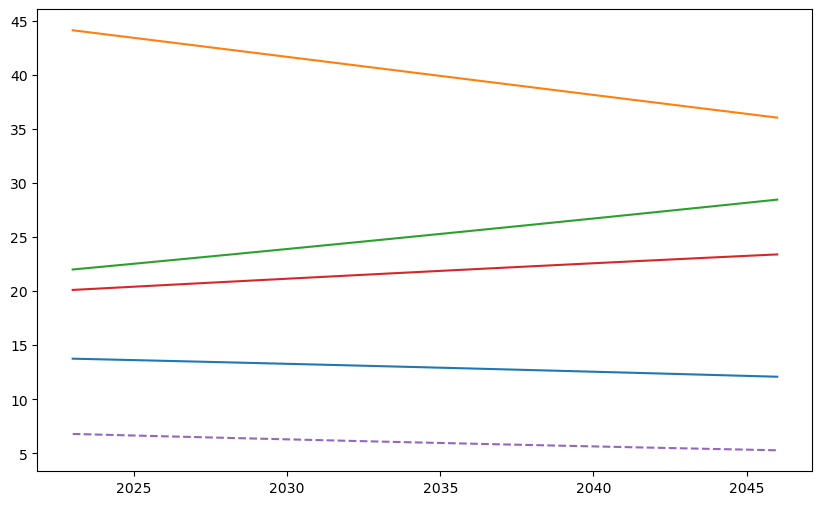

In [12]:
# Proyectar la población futura en grafica
proyeccion_poblacion_futura = {}

for grupo, tasa_crecimiento in promedio_tasas_crecimiento_por_grupo.items():
    poblacion_actual = resultados_por_año['2022'][grupo]
    proyeccion_poblacion_futura[grupo] = {}
    for año in range(2023, 2047):
        poblacion_proyectada = poblacion_actual * (1 + tasa_crecimiento / 100)
        proyeccion_poblacion_futura[grupo][año] = int(poblacion_proyectada)
        poblacion_actual = poblacion_proyectada

# Calcular los porcentajes de la población para cada grupo de edad sobre la población total para cada año de la proyección
porcentajes_por_grupo_por_año_2023_2046 = {}

# Recorrer la proyección de población futura desde 2023 a 2046
for año in range(2023, 2047):
    # Calcular la población total para el año actual
    poblacion_total_actual = sum(proyeccion_poblacion_futura[grupo][año] for grupo in proyeccion_poblacion_futura.keys())
    
    # Calcular los porcentajes para cada grupo de edad sobre la población total
    porcentajes_por_año = {}
    for grupo in proyeccion_poblacion_futura.keys():
        poblacion_grupo_actual = proyeccion_poblacion_futura[grupo][año]
        porcentaje_grupo = (poblacion_grupo_actual / poblacion_total_actual) * 100
        porcentajes_por_año[grupo] = porcentaje_grupo
        
    # Almacenar los porcentajes para el año actual
    porcentajes_por_grupo_por_año_2023_2046[año] = porcentajes_por_año

# Crear un DataFrame con los porcentajes por año
df_porcentajes_proyeccion = pd.DataFrame(porcentajes_por_grupo_por_año_2023_2046).T

# Obtener los años
años_proyeccion = df_porcentajes_proyeccion.index

# Obtener los porcentajes para cada grupo de edad
porcentajes_menores_de_15_proyeccion = df_porcentajes_proyeccion["Menores de 15"]
porcentajes_entre_15_y_49_proyeccion = df_porcentajes_proyeccion["Entre 15 y 49"]
porcentajes_entre_50_y_64_proyeccion = df_porcentajes_proyeccion["Entre 50 y 64"]
porcentajes_mayores_de_65_proyeccion = df_porcentajes_proyeccion["Mayores de 65"]

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los porcentajes de cada grupo de edad para la proyección
ax.plot(años_proyeccion, porcentajes_menores_de_15_proyeccion, label="Menores de 15")
ax.plot(años_proyeccion, porcentajes_entre_15_y_49_proyeccion, label="Entre 15 y 49")
ax.plot(años_proyeccion, porcentajes_entre_50_y_64_proyeccion, label="Entre 50 y 64")
ax.plot(años_proyeccion, porcentajes_mayores_de_65_proyeccion, label="Mayores de 65")

# Graficar la proyección de la tasa de natalidad
ax.plot(años_proyeccion, list(proyeccion_tasa_natalidad_1998_2022.values()), label="Proyección Tasa de Natalidad (1998-2022)", linestyle='--')

# Graficar la proyección de la esperanza de vida
ax.plot(años_proyeccion, list(proyeccion_esperanza_vida_1999_2022.values()), label="Proyección Esperanza de Vida (1999-2022)", linestyle='--')


# Configurar el gráfico
ax.set_title("Proyección con variables adicionales 1998-2022")
ax.set_xlabel("Año")
ax.set_ylabel("Porcentaje/Tasa")
ax.legend(fontsize='small', bbox_to_anchor=(0.9, 0.65), loc='center right') 
ax.grid(True)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular los porcentajes de la población para cada grupo de edad sobre la población total para cada año de la proyección
porcentajes_por_grupo_por_año_2012_2022 = {}

# Recorrer la proyección de población futura desde 2023 a 2046
for año in range(2023, 2047):
    # Calcular la población total para el año actual
    poblacion_total_actual = sum(proyeccion_poblacion_futura_2012_2022[grupo][año] for grupo in proyeccion_poblacion_futura_2012_2022.keys())
    
    # Calcular los porcentajes para cada grupo de edad sobre la población total
    porcentajes_por_año = {}
    for grupo in proyeccion_poblacion_futura_2012_2022.keys():
        poblacion_grupo_actual = proyeccion_poblacion_futura_2012_2022[grupo][año]
        porcentaje_grupo = (poblacion_grupo_actual / poblacion_total_actual) * 100
        porcentajes_por_año[grupo] = porcentaje_grupo
        
    # Almacenar los porcentajes para el año actual
    porcentajes_por_grupo_por_año_2012_2022[año] = porcentajes_por_año

# Crear un DataFrame con los porcentajes por año
df_porcentajes_proyeccion = pd.DataFrame(porcentajes_por_grupo_por_año_2012_2022).T

# Obtener los años
años_proyeccion = df_porcentajes_proyeccion.index

# Obtener los porcentajes para cada grupo de edad
porcentajes_menores_de_15_proyeccion = df_porcentajes_proyeccion["Menores de 15"]
porcentajes_entre_15_y_49_proyeccion = df_porcentajes_proyeccion["Entre 15 y 49"]
porcentajes_entre_50_y_64_proyeccion = df_porcentajes_proyeccion["Entre 50 y 64"]
porcentajes_mayores_de_65_proyeccion = df_porcentajes_proyeccion["Mayores de 65"]

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los porcentajes de cada grupo de edad para la proyección
ax.plot(años_proyeccion, porcentajes_menores_de_15_proyeccion, label="Menores de 15")
ax.plot(años_proyeccion, porcentajes_entre_15_y_49_proyeccion, label="Entre 15 y 49")
ax.plot(años_proyeccion, porcentajes_entre_50_y_64_proyeccion, label="Entre 50 y 64")
ax.plot(años_proyeccion, porcentajes_mayores_de_65_proyeccion, label="Mayores de 65")

# Graficar la proyección de la tasa de natalidad
ax.plot(años_proyeccion, list(proyeccion_tasa_natalidad_2012_2022.values()), label="Proyección Tasa de Natalidad (2012-2022)", linestyle='--')

# Graficar la proyección de la esperanza de vida
ax.plot(años_proyeccion, list(proyeccion_esperanza_vida_2012_2022.values()), label="Proyección Esperanza de Vida (2012-2022)", linestyle='--')

# Configurar el gráfico
ax.set_title("Proyección con variables adicionales 2012-2022")
ax.set_xlabel("Año")
ax.set_ylabel("Porcentaje / Tasa")
ax.legend(fontsize='small', bbox_to_anchor=(0.9, 0.65), loc='center right') 
ax.grid(True)

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()